<a href="https://colab.research.google.com/github/z1chh/z1chh/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hepatitis and Messidor Datasets Analysis**

In [365]:
# Hepatitis and Messidor Datasets Analysis
# HU, Zi Chen
# PRAIRIE, Nika
# WANG, Sean

Set of Imports

In [338]:
!pip install PyDrive

In [339]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [340]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [341]:
downloaded = drive.CreateFile({'id':"1j4V1N48jKg4iwS0Mja-jPvnJeibXOy6g"})   # replace the id with id of file you want to access
downloaded.GetContentFile('hepatitis.csv')                                  # replace the file name with your file
downloaded2 = drive.CreateFile({'id':"1gWR93QEb1W7EKhCnmrq1CtfWIiqkXVWY"})
downloaded2.GetContentFile('messidor_features.arff')

**DATASET FOR HEPATITIS**

In [342]:
import numpy as np
import pandas as pd
from scipy.io import arff

%matplotlib inline                                  
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

np.random.seed(1234)
# Put header names into a var for forloop to clear '?'s
header_names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals',
                'Fatigue', 'Malaise', 'Anorexia','LiverBig', 'LiverFirm',
                'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin',
                'Alk PhosPhate', 'Sgot', 'Albumin', 'Protime', 'Histology']

data_hepatitis = pd.read_csv('hepatitis.csv', names= header_names)

pd.set_option("display.max_rows", 20)

# Print initial data (hepatitis)
print("Task 1: Acquire, preprocess, and analyze the data (hepatitis)")
print("Raw data from hepatitis:\n")
print("\n==================================================================")
print("==================================================================")
print(data_hepatitis)
print("==================================================================")
print("==================================================================\n")
df = pd.DataFrame(data_hepatitis)

# Clean the data
for n in header_names:
    df = df.loc[df[n] != '?']

# Cast int values to float values
for n in header_names:
    df[n] = pd.to_numeric(df[n], downcast="float")
print("\n\nCleaning data from hepatitis (rows with '?'):")
print("\n=======================================================================")
print("=======================================================================")
print(df)
print("=======================================================================")
print("=======================================================================\n")

df2 = (df-df.min())/(df.max()-df.min())

# Stats
print("Basic Statistics for hepatitis:")

print("=========================================")
print("Min values:\n", df.min())
print("=========================================\n")

print("\n=========================================")
print("Max values:\n", df.max())
print("=========================================\n")

print("\n=========================================")
print("Mean values:\n", df.mean())
print("=========================================\n")

print("\n=========================================")
print("Standard deviation values:\n", df.std(numeric_only=None))
print("=========================================\n")

print("\n=========================================")
print("Correlation values:\n", df.corrwith(df["Class"]).sort_values(ascending=False))
print("=========================================\n\n")
to_drop2 = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals',
                'Fatigue', 'Malaise', 'Anorexia','LiverBig', 'LiverFirm',
                'SpleenPalpable', 'Spiders','Ascites', 'Varices', 'Bilirubin',
                'Alk PhosPhate', 'Sgot', 'Histology']
df_norm = df2

for n in to_drop2:
  df_norm = df_norm.drop(n,axis=1)

Task 1: Acquire, preprocess, and analyze the data (hepatitis)
Raw data from hepatitis:


     Class  Age  Sex Steroid  ...  Sgot Albumin Protime Histology
0        2   30    2       1  ...    18     4.0       ?         1
1        2   50    1       1  ...    42     3.5       ?         1
2        2   78    1       2  ...    32     4.0       ?         1
3        2   31    1       ?  ...    52     4.0      80         1
4        2   34    1       2  ...   200     4.0       ?         1
..     ...  ...  ...     ...  ...   ...     ...     ...       ...
150      1   46    1       2  ...   242     3.3      50         2
151      2   44    1       2  ...   142     4.3       ?         2
152      2   61    1       1  ...    20     4.1       ?         2
153      2   53    2       1  ...    19     4.1      48         2
154      1   43    1       2  ...    19     3.1      42         2

[155 rows x 20 columns]



Cleaning data from hepatitis (rows with '?'):

     Class   Age  Sex  Steroid  ...   Sgot  

**DATASET FOR MESSIDOR**

In [343]:
print("Task 1: Acquire, preprocess, and analyze the data (messidor)")
data_messidor = arff.loadarff('messidor_features.arff')
# Print initial data (messidor)
print("Raw data from messidor:")
print("\n==================================================================")
print("==================================================================")
print(data_messidor[0])
print("==================================================================")
print("==================================================================\n")

counter = 0

to_remove = []
print("The messidor data has a total of %d rows." % (len(data_messidor[0])))
for i in range(0, len(data_messidor[0])):
    info = data_messidor[0][i]
    if info[0] == 0.0:
        to_remove.append(i)
        counter = counter +1

# Clean data
print("\n\nCleaning data from messidor (binary feature at position 0)...")
print("The indexes of the rows to remove are:", to_remove, ".")

new_data = np.delete(data_messidor[0], to_remove, 0)

print("\n==================================================================")
print("==================================================================")
print(new_data)
print("==================================================================")
print("==================================================================\n")

print("The messidor data has a total of %d rows." % (len(new_data)))
print("(removed a total of %d rows)" % counter)

# Convert it into a panda dataframe
mess_df = pd.DataFrame(new_data)

# First convert the class from a byte to an int
def conv(c):
    return int.from_bytes(c, "little") - 48;
mess_df['Class'] = mess_df['Class'].apply(conv)

# Cast every value into a float
for col in mess_df:
    mess_df[col] = pd.to_numeric(mess_df[col], downcast="float")

#Normalized matrix
dfh2 = (mess_df-mess_df.min())/(mess_df.max()-mess_df.min())

# Stats
print("Basic Statistics for messidor:")

print("=========================================")
print("Min values:\n", mess_df.min())
print("=========================================\n")

print("\n=========================================")
print("Max values:\n", mess_df.max())
print("=========================================\n")

print("\n=========================================")
print("Mean values:\n", mess_df.mean())
print("=========================================\n")

print("\n=========================================")
print("Standard deviation values:\n", mess_df.std(numeric_only=None))
print("=========================================\n")

print("\n=========================================")
print("Correlation values:\n", mess_df.corrwith(mess_df["Class"]).sort_values(ascending=False))
print("=========================================\n")

Task 1: Acquire, preprocess, and analyze the data (messidor)
Raw data from messidor:

[(1., 1., 22., 22., 22., 19., 18., 14., 49.895756, 17.775994,  5.27092 , 0.771761, 0.018632, 0.006864, 0.003923, 0.003923, 0.486903, 0.100025, 1., b'0')
 (1., 1., 24., 24., 22., 18., 16., 13., 57.709936, 23.799994,  3.325423, 0.234185, 0.003903, 0.003903, 0.003903, 0.003903, 0.520908, 0.144414, 0., b'0')
 (1., 1., 62., 60., 59., 54., 47., 33., 55.831441, 27.993933, 12.687485, 4.852282, 1.393889, 0.373252, 0.041817, 0.007744, 0.530904, 0.128548, 0., b'1')
 ...
 (1., 0., 49., 48., 48., 45., 43., 33., 30.461898, 13.96698 ,  1.763305, 0.137858, 0.011221, 0.      , 0.      , 0.      , 0.560632, 0.129843, 0., b'0')
 (1., 1., 39., 36., 29., 23., 13.,  7., 40.525739, 12.604947,  4.740919, 1.07757 , 0.563518, 0.32686 , 0.239568, 0.174584, 0.485972, 0.10669 , 1., b'1')
 (1., 1.,  7.,  7.,  7.,  7.,  7.,  5., 69.423565,  7.031843,  1.750548, 0.046597, 0.02118 , 0.008472, 0.      , 0.      , 0.556192, 0.088957, 0

**TRAINING AND TEST SETS**

instances (N) 	 80 
 features (D) 	 2 
 classes (C) 	 2.0


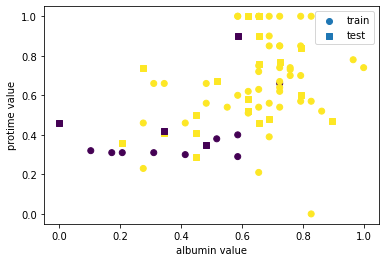

In [344]:
#HEPATITIS TRAINING AND TESTING DATA
to_drop2 = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals',
                'Fatigue', 'Malaise', 'Anorexia','LiverBig', 'LiverFirm',
                'SpleenPalpable', 'Spiders','Ascites', 'Varices', 'Bilirubin',
                'Alk PhosPhate', 'Sgot', 'Histology']
df_norm = df2

for n in to_drop2:
  df_norm = df_norm.drop(n,axis=1)

x, y = df_norm.to_numpy(), df['Class'].to_numpy()                                               

(N,D), C = x.shape, np.max(y)                                                      #np.max(y)+1 because y has 0,1,2 as values but we need to show that there are 3 classes so,
                                                                                    #np.max(y) = 2 and np.max(y)+1 = 3
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')

                                                                #generates an indices array from 0 to N-1 and permutes it 
inds = np.random.permutation(N) 

x_train, y_train = x[inds[:55]], y[inds[:55]]
x_test, y_test = x[inds[55:]], y[inds[55:]]
#print(x_train)
#print(y_test)

plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('protime value')
plt.xlabel('albumin value')
plt.show()

instances (N) 	 1147 
 features (D) 	 2 
 classes (C) 	 2.0


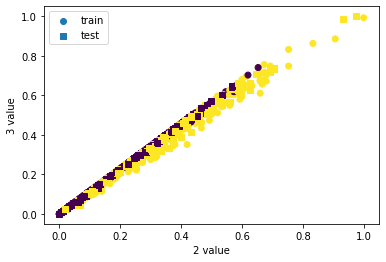

In [345]:
########
#MESSIDOR TRAINING AND TESTING DATA
dfh = dfh2

to_drop_hep = ['0','1','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','Class']
for n in to_drop_hep:
  dfh= dfh.drop(n,axis=1)
#print(dfh)
xh, yh= dfh.to_numpy(), mess_df['Class'].to_numpy()
#print(yh)
#print(len(yh))
(Nh,Dh), Ch = xh.shape, np.max(yh)+1 
inds = np.random.permutation(Nh)

print(f'instances (N) \t {Nh} \n features (D) \t {Dh} \n classes (C) \t {Ch}')
xh_train, yh_train = xh[inds[:800]], yh[inds[:800]]
xh_test, yh_test = xh[inds[800:]], yh[inds[800:]]
#print(len(yh_test))
#print(yh_test)

plt.scatter(xh_train[:,0], xh_train[:,1], c=yh_train, marker='o', label='train')
plt.scatter(xh_test[:,0], xh_test[:,1], c=yh_test, marker='s', label='test')
plt.legend()
plt.ylabel('3 value')
plt.xlabel('2 value')
plt.show()

**KNN CLASS**

In [346]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2,axis = -1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:
    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn                                                    #we need to use self because the parameters would be stored in variables 
                                                                                  #on the stack and would be discarded when the init method goes out of scope
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y)+1
        
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]        
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        print("The shape of the distances is", distances.shape)                          
        #When operating on two arrays, NumPy compares their shapes element-wise. 
        #It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when: they are equal, or one of them is 1

        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)

        print("The shape of knns is: ",knns.shape)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)#[1:] #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K                                                          #nd you just divided by K so that we scale the value from zero to 1.
        return y_prob, knns

**DECISION TREE**

**DATA STRUCTURE**

In [347]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

**GREEDY SPLITTING OF A NODE**

In [348]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

**COST FUNCTIONS**

In [349]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [350]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def _fit_tree(self, node):
        pass

    def predict(self, data_test):
        pass

**FIT**

In [351]:
def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

**PREDICT**

In [352]:
def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

**EXPERIMENTS**

The shape of the distances is (25, 55)
The shape of knns is:  (25, 3)
knns shape: (25, 3)
y_prob shape: (25, 3)
accuracy is 80.0.


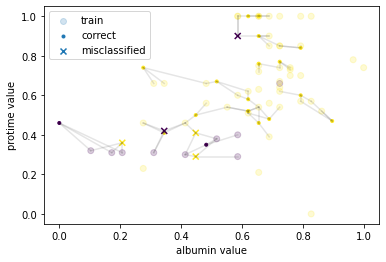

In [353]:
########
#HEPATITIS - KNN
model = KNN(K=3)
x_train = (x_train).astype(np.float)
y_train = (y_train).astype(np.int)
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
print('knns shape:', knns.shape)
print('y_prob shape:', y_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
# print(y_pred)
print(f'accuracy is {accuracy*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the points
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
      hor = x_test[i,0], x_train[knns[i,k],0]
      ver = x_test[i,1], x_train[knns[i,k],1]
      plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('protime value')
plt.xlabel('albumin value')
plt.legend()
plt.show()





The shape of the distances is (347, 800)
The shape of knns is:  (347, 2)
knnsh shape: (347, 2)
yh_prob shape: (347, 2)
accuracy is 68.6.


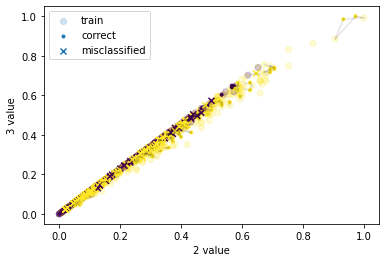

In [354]:
########
#MESSIDOR - KNN
modelh = KNN(K=2)
xh_train = xh_train.astype(np.float)
yh_train = yh_train.astype(np.int)

yh_prob, knnsh = modelh.fit(xh_train, yh_train).predict(xh_test)
print('knnsh shape:', knnsh.shape)
print('yh_prob shape:', yh_prob.shape)

#To get hard predictions by choosing the class with the maximum probability
yh_pred = np.argmax(yh_prob,axis=-1)                                                #This returns the indeces of the largest element in the array
accuracyh = np.sum(yh_pred == yh_test)/yh_test.shape[0]
# print(yh_pred)
print(f'accuracy is {accuracyh*100:.1f}.')

#boolean array to later slice the indexes of correct and incorrect predictions
correcth = yh_test == yh_pred
incorrecth = np.logical_not(correcth)

#visualization of the points
plt.scatter(xh_train[:,0], xh_train[:,1], c=yh_train, marker='o', alpha=.2, label='train')
plt.scatter(xh_test[correcth,0], xh_test[correcth,1], marker='.', c=yh_pred[correcth], label='correct')
plt.scatter(xh_test[incorrecth,0], xh_test[incorrecth,1], marker='x', c=yh_test[incorrecth], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(xh_test.shape[0]):
    for k in range(modelh.K):
        hor = xh_test[i,0], xh_train[knnsh[i,k],0]
        ver = xh_test[i,1], xh_train[knnsh[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('3 value')
plt.xlabel('2 value')
plt.legend()
plt.show()

Hepatitis using decision tree (max depth of 20):
accuracy is 80.0.


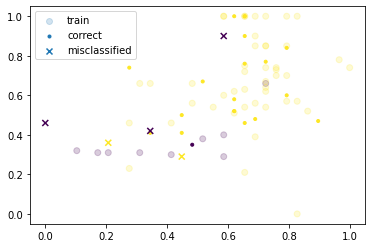

In [355]:
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print("Hepatitis using decision tree (max depth of 20):")
print(f'accuracy is {accuracy*100:.1f}.')
#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.show()

Messidor using decision tree (max depth of 20):
accuracy is 68.6.


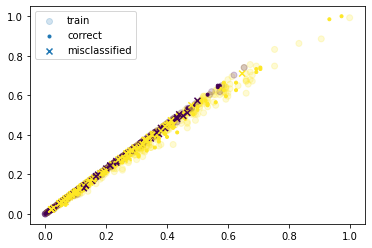

In [356]:
treeh = DecisionTree(max_depth=20)
probs_testh = tree.fit(xh_train, yh_train).predict(xh_test)
y_predh = np.argmax(probs_testh,1)
accuracyh = np.sum(yh_pred == yh_test)/yh_test.shape[0]
print("Messidor using decision tree (max depth of 20):")
print(f'accuracy is {accuracyh*100:.1f}.')
#visualization
correcth = yh_test == yh_pred
incorrecth = np.logical_not(correcth)
plt.scatter(xh_train[:,0], xh_train[:,1], c=yh_train, marker='o', alpha=.2, label='train')
plt.scatter(xh_test[correcth,0], xh_test[correcth,1], marker='.', c=yh_pred[correcth], label='correct')
plt.scatter(xh_test[incorrecth,0], xh_test[incorrecth,1], marker='x', c=yh_test[incorrecth], label='misclassified')
plt.legend()
plt.show()

**GRAPHS OF ACCURACY OVER KNN FOR EUCLIDEAN AND MANHATTAN DISTANCE FUNCTIONS**

The following graphs show the relation between the accuracy of the K-NN algorithm depending of the choice of K (using euclidean distance).
The first graph represents the K-NN for Hepatitis, and the second for Messidor.


Hepatitis (Euclidean)



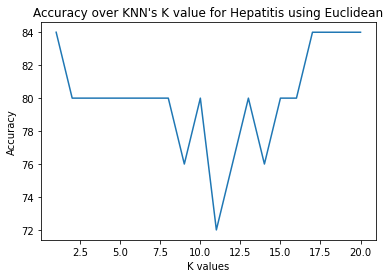

The average accuracy was 80.00.
The maximum accuracy was 84.00 and the lowest accurancy was 72.00.


In [357]:
''' THIS IS FOR EUCLIDEAN FUNCTION FOR KNN ON HEPATITIS DATASET'''

# Graphs representing the accuracies of K-NN on Hepatitis and Messidor over different values of the hyper-parameter (euclidean)
print("The following graphs show the relation between the accuracy of the K-NN algorithm depending of the choice of K (using euclidean distance).")
print("The first graph represents the K-NN for Hepatitis, and the second for Messidor.\n\n")

# Hepatitis
k_values_hep = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
acc_values_hep = np.array([84, 80, 80, 80, 80, 80, 80, 80, 76, 80, 72, 76, 80, 76, 80, 80, 84, 84, 84, 84])
print("Hepatitis (Euclidean)")
#for i in range(len(k_values_hep)):
#    print("For K = %d, the accuracy of K-NN is %.1f." % (k_values_hep[i], acc_values_hep[i]))
print()
plt.plot(k_values_hep,acc_values_hep)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy over KNN's K value for Hepatitis using Euclidean")
plt.show()
print("The average accuracy was %.2f." % acc_values_hep.mean())
print("The maximum accuracy was %.2f and the lowest accurancy was %.2f." % (acc_values_hep.max(), acc_values_hep.min()))

Messidor (Euclidean)



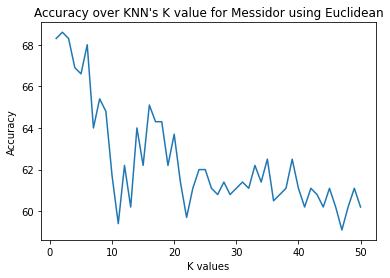

The average accuracy was 62.41.
The maximum accuracy was 68.60 and the lowest accurancy was 59.10.


In [358]:
''' THIS IS FOR EUCLIDEAN FUNCTION FOR KNN ON MESSIDOR DATASET'''
# Messidor
k_values_mess = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
acc_values_mess = np.array([68.3, 68.6, 68.3, 66.9, 66.6, 68.0, 64.0, 65.4, 64.8, 61.7, 59.4, 62.2, 60.2, 64.0, 62.2, 65.1, 64.3, 64.3, 62.2, 63.7, 61.4, 59.7, 61.1, 62.0, 62.0, 61.1, 60.8, 61.4, 60.8, 61.1, 61.4, 61.1, 62.2, 61.4, 62.5, 60.5, 60.8, 61.1, 62.5, 61.1, 60.2, 61.1, 60.8, 60.2, 61.1, 60.2, 59.1, 60.2, 61.1, 60.2])
print("Messidor (Euclidean)")
#for i in range(len(k_values_mess)):
#    print("For K = %d, the accuracy of K-NN is %.1f." % (k_values_mess[i], acc_values_mess[i]))
print()
plt.plot(k_values_mess,acc_values_mess)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy over KNN's K value for Messidor using Euclidean")
plt.show()
print("The average accuracy was %.2f." % acc_values_mess.mean())
print("The maximum accuracy was %.2f and the lowest accurancy was %.2f." % (acc_values_mess.max(), acc_values_mess.min()))

The following graphs show the relation between the accuracy of the K-NN algorithm depending of the choice of K (using manhattan distance).
The first graph represents the K-NN for Hepatitis, and the second for Messidor.


Hepatitis (Manhattan)



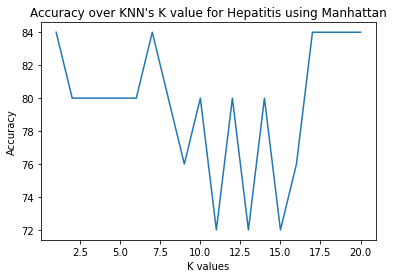

The average accuracy was 79.60.
The maximum accuracy was 84.00 and the lowest accurancy was 72.00.


In [359]:
''' THIS IS FOR MANHATTAN FUNCTION FOR KNN ON HEPATITIS DATASET'''
# Graphs representing the accuracies of K-NN on Hepatitis and Messidor over different values of the hyper-parameter (manhattan)
print("The following graphs show the relation between the accuracy of the K-NN algorithm depending of the choice of K (using manhattan distance).")
print("The first graph represents the K-NN for Hepatitis, and the second for Messidor.\n\n")

# Hepatitis
k_values_hep = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
acc_values_hep = np.array([84, 80, 80, 80, 80, 80, 84, 80, 76, 80, 72, 80, 72, 80, 72, 76, 84, 84, 84, 84])
print("Hepatitis (Manhattan)")
#for i in range(len(k_values_hep)):
#    print("For K = %d, the accuracy of K-NN is %.1f." % (k_values_hep[i], acc_values_hep[i]))
print()
plt.plot(k_values_hep,acc_values_hep)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy over KNN's K value for Hepatitis using Manhattan")
plt.show()
print("The average accuracy was %.2f." % acc_values_hep.mean())
print("The maximum accuracy was %.2f and the lowest accurancy was %.2f." % (acc_values_hep.max(), acc_values_hep.min()))

Messidor (Manhattan)



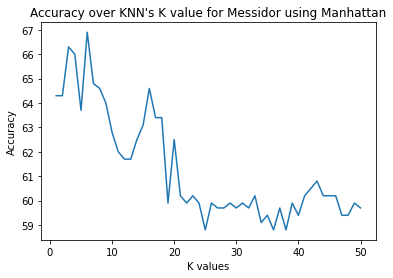

The average accuracy was 61.32.
The maximum accuracy was 66.90 and the lowest accurancy was 58.80.


In [360]:
''' THIS IS FOR MANHATTAN FUNCTION FOR KNN ON MESSIDOR DATASET'''
# Messidor
k_values_mess = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])
acc_values_mess = np.array([64.3, 64.3, 66.3, 66.0, 63.7, 66.9, 64.8, 64.6, 64.0, 62.8, 62.0, 61.7, 61.7, 62.5, 63.1, 64.6, 63.4, 63.4, 59.9, 62.5, 60.2, 59.9, 60.2, 59.9, 58.8, 59.9, 59.7, 59.7, 59.9, 59.7, 59.9, 59.7, 60.2, 59.1, 59.4, 58.8, 59.7, 58.8, 59.9, 59.4, 60.2, 60.5, 60.8, 60.2, 60.2, 60.2, 59.4, 59.4, 59.9, 59.7])
print("Messidor (Manhattan)")
#for i in range(len(k_values_mess)):
#    print("For K = %d, the accuracy of K-NN is %.1f." % (k_values_mess[i], acc_values_mess[i]))
print()
plt.plot(k_values_mess,acc_values_mess)
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Accuracy over KNN's K value for Messidor using Manhattan")
plt.show()
print("The average accuracy was %.2f." % acc_values_mess.mean())
print("The maximum accuracy was %.2f and the lowest accurancy was %.2f." % (acc_values_mess.max(), acc_values_mess.min()))

The following graphs show decision boudaries for the first few values of K (hepatitis K-NN).
Graph for K = 1:
The shape of the distances is (40000, 55)
The shape of knns is:  (40000, 1)


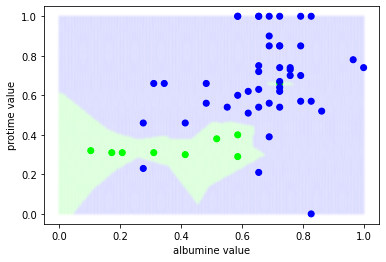





Graph for K = 2:
The shape of the distances is (40000, 55)
The shape of knns is:  (40000, 2)


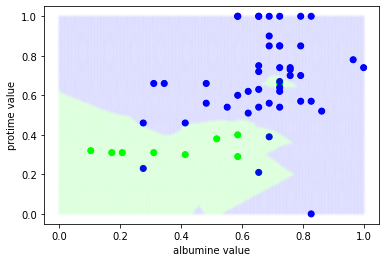





Graph for K = 3:
The shape of the distances is (40000, 55)
The shape of knns is:  (40000, 3)


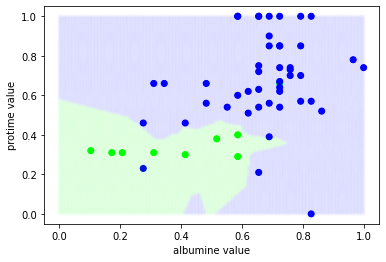





Graph for K = 4:
The shape of the distances is (40000, 55)
The shape of knns is:  (40000, 4)


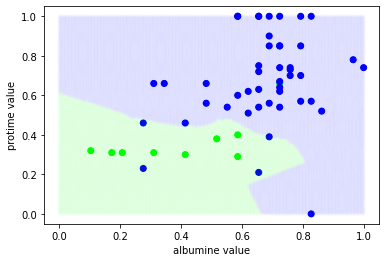

In [361]:
print("The following graphs show decision boudaries for the first few values of K (hepatitis K-NN).")
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for k in range(1,5):
  print("Graph for K = %d:" % k)
  model = KNN(K=k)
  #C = C.astype(np.int)
  y_train_prob = np.zeros((y_train.shape[0], 3))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(x_train, y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1
            
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.ylabel('protime value')
  plt.xlabel('albumine value')
  plt.show()
  print("\n\n\n")

The following graphs show decision boudaries for the first few values of maximum depth (hepatitis decision tree).
Graph with max depth of 1:


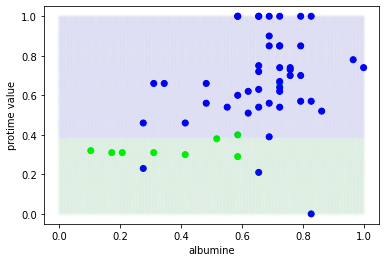





Graph with max depth of 2:


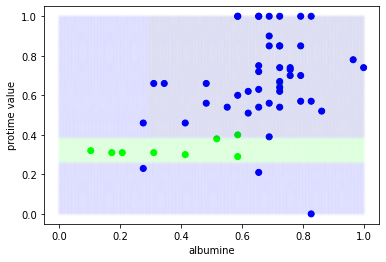





Graph with max depth of 3:


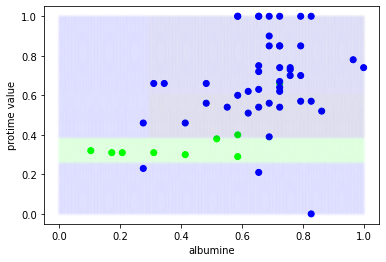





Graph with max depth of 4:


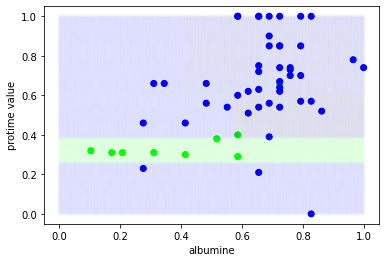





Graph with max depth of 5:


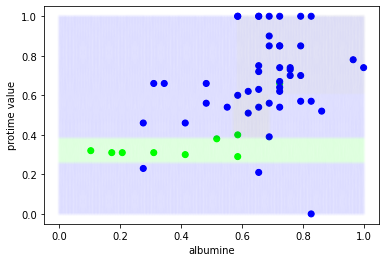





Graph with max depth of 6:


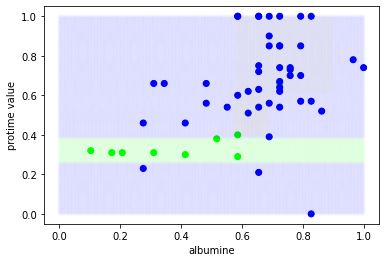





Graph with max depth of 7:


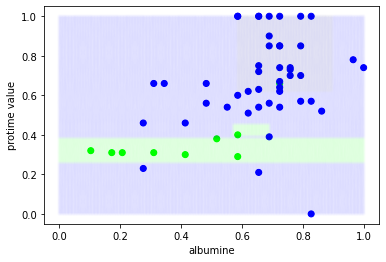





Graph with max depth of 8:


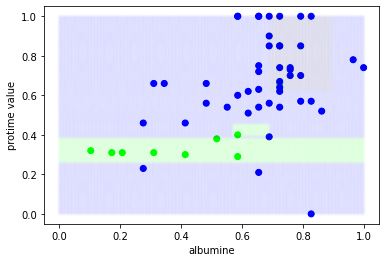





Graph with max depth of 9:


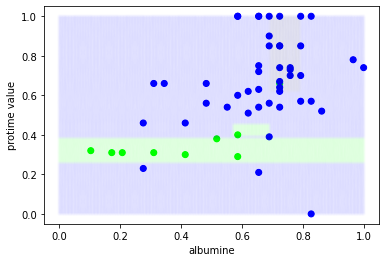





Graph with max depth of 10:


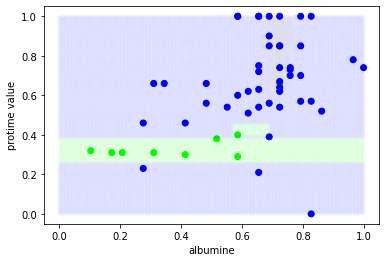

In [362]:
print("The following graphs show decision boudaries for the first few values of maximum depth (hepatitis decision tree).")
x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

for i in range(1,11):
    print("Graph with max depth of %d:" % i)
    model = DecisionTree(max_depth=i)
    y_train_prob = np.zeros((y_train.shape[0], 3))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    y_prob_all = model.fit(x_train, y_train).predict(x_all)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
    plt.ylabel('protime value')
    plt.xlabel('albumine')
    plt.show()
    print("\n\n\n")